# Read Dataset

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('ecommerce-session-bigquery.csv')
df

fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...                   ...             ...      ...            ...   
9995  8518740059623315737        Referral    83144  United States   
9996  1592171014215970461  Organic Search   302378       Colombia   
9997  6776942687101397292      Affiliates    41387         Israel   
9998  3008082643543388126  Organic Search    28613         Canada   
9999  4307804717807925609  Organic Search   407285  United States   

                               city  totalTransactionRevenue  transactions  \
0                         (not set)                      NaN           NaN   
1     not available in demo dataset                      NaN           NaN   
2                     San Francisco                      NaN           NaN   
3                           Boulder                      NaN           NaN   
4     not available in demo dataset                      NaN           NaN   
...                             ...                      ...           ...   
9995                      Ann Arbor                      NaN           NaN   
9996                         Bogota                      NaN           NaN   
9997  not available in demo dataset                      NaN           NaN   
9998                       Montreal                      NaN           NaN   
9999  not available in demo dataset                      NaN           NaN   

      timeOnSite  pageviews  sessionQualityDim  ...  itemQuantity  \
0         1567.0       82.0               17.0  ...           NaN   
1          321.0        8.0                NaN  ...           NaN   
2          927.0       11.0               63.0  ...           NaN   
3         1616.0       13.0               38.0  ...           NaN   
4         1222.0       45.0               53.0  ...           NaN   
...          ...        ...                ...  ...           ...   
9995       561.0       18.0                NaN  ...           NaN   
9996       365.0        7.0                NaN  ...           NaN   
9997       107.0        7.0                NaN  ...           NaN   
9998        93.0       11.0                NaN  ...           NaN   
9999       455.0       21.0                NaN  ...           NaN   

      itemRevenue transactionRevenue  transactionId  pageTitle  searchKeyword  \
0             NaN                NaN            NaN        NaN            NaN   
1             NaN                NaN            NaN        NaN            NaN   
2             NaN                NaN            NaN        NaN            NaN   
3             NaN                NaN            NaN        NaN            NaN   
4             NaN                NaN            NaN        NaN            NaN   
...           ...                ...            ...        ...            ...   
9995          NaN                NaN            NaN       Bags            NaN   
9996          NaN                NaN            NaN       Bags            NaN   
9997          NaN                NaN            NaN       Bags            NaN   
9998          NaN                NaN            NaN       Bags            NaN   
9999          NaN                NaN            NaN       Bags            NaN   

         pagePathLevel1 eCommerceAction_type eCommerceAction_step  \
0       /storeitem.html                    0                    1   
1       /storeitem.html                    0                    1   
2       /storeitem.html                    0                    1   
3       /storeitem.html                    0                    1   
4       /storeitem.html                    0                    1   
...                 ...       

# Introduction

To preprocess and analyze datasets on our own can be quite time and energy consuming. Especially if the dataset has a lot of columns (32 like in this dataset), and a bit too many rows to check by eye-balling it (10000 rows).

Therefore it is very very useful to start by asking an AI assistant (in this case ChatGPT) to lay the initial groundwork for us. Despite its speed and superior knowledge database, unfortunately (or fortunately, depending on how you look at it) ChatGPT and other AI models can often be quite limited and narrow in its assessments. That is where we, as the superior being intervene and add or subtract to its results.

Doing everything by hand on our own will most definitely be very energy and time consuming. Doing everything through ChatGPT might overlook key aspects that the AI model might miss. Therefore the purpose of this notebook is too combine the two in order to get the best of both worlds, speed from the AI model, as well as accountablity and real-world accuracy from the supervising human.

# Data Preprocessing

## Missing Values Handling

**ChatGPT prompt:**

okay now, from the above raw dataset, do the following:

2. Do what you deem as necessary preprocessing steps (e.g., any cleaning, transformation, and/or aggregation) to all 32 columns, and explain why you deem them necessary.

**ChatGPT response:**

`# Handle missing values`

`# We will fill missing numeric columns with 0 where applicable (e.g., no transactions means 0 revenue)`

`data['totalTransactionRevenue'].fillna(0, inplace=True)`

`data['transactions'].fillna(0, inplace=True)`

`data['itemQuantity'].fillna(0, inplace=True)`

`data['itemRevenue'].fillna(0, inplace=True)`

`data['transactionRevenue'].fillna(0, inplace=True)`

`# Replace placeholder values like '(not set)' and 'not available in demo dataset' with NaN`
`data.replace({'(not set)': pd.NA, 'not available in demo dataset': pd.NA}, inplace=True)`

We should look at the number of missing values from each column, below:

In [ ]:
df.isnull().sum()

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue             10000
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceAction_step           0
eCommerceAction_option     10000
dtype: int64

We can see that there are 8 columns that are completely filled with NULL values:

1. searchKeyword
2. transactionId
3. transactionRevenue
4. itemRevenue
5. itemQuantity
6. productRevenue
7. productRefundAmount
8. eCommerceAction_option

and 4 columns that have an overwhelming majority of NULL values:

1. productQuantity
2. sessionQualityDim
3. transactions
4. totalTransactionRevenue

Now, depending on the scope of the analysis (or future modelling for that matter), we can decide to keep some if not all of the columns that have an overwhelming majority of NULL values. However, for the 8 columns that are completely filled with NULL values, they are basically useless, and instead of filling them with zero or other values, they should just be dropped from the dataframe.

However, in the response above, ChatGPT decided to fill the following columns with the value zero:

1. totalTransactionRevenue
2. transactions
3. itemQuantity
4. itemRevenue
5. transactionRevenue

Yet, itemQuantity, itemRevenue, and transactionRevenue are completely filled with NULL values. So we need to make modifications to ChatGPT's response, and add to it the other columns that it (for some unknown reason) did not clean.

In [ ]:
# Drop necessary columns

df = df.drop(columns=['searchKeyword','transactionId','transactionRevenue','itemRevenue','itemQuantity','productRevenue','productRefundAmount','eCommerceAction_option'])
df

fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...                   ...             ...      ...            ...   
9995  8518740059623315737        Referral    83144  United States   
9996  1592171014215970461  Organic Search   302378       Colombia   
9997  6776942687101397292      Affiliates    41387         Israel   
9998  3008082643543388126  Organic Search    28613         Canada   
9999  4307804717807925609  Organic Search   407285  United States   

                               city  totalTransactionRevenue  transactions  \
0                         (not set)                      NaN           NaN   
1     not available in demo dataset                      NaN           NaN   
2                     San Francisco                      NaN           NaN   
3                           Boulder                      NaN           NaN   
4     not available in demo dataset                      NaN           NaN   
...                             ...                      ...           ...   
9995                      Ann Arbor                      NaN           NaN   
9996                         Bogota                      NaN           NaN   
9997  not available in demo dataset                      NaN           NaN   
9998                       Montreal                      NaN           NaN   
9999  not available in demo dataset                      NaN           NaN   

      timeOnSite  pageviews  sessionQualityDim  ...  productPrice  \
0         1567.0       82.0               17.0  ...             0   
1          321.0        8.0                NaN  ...             0   
2          927.0       11.0               63.0  ...             0   
3         1616.0       13.0               38.0  ...             0   
4         1222.0       45.0               53.0  ...             0   
...          ...        ...                ...  ...           ...   
9995       561.0       18.0                NaN  ...       4990000   
9996       365.0        7.0                NaN  ...       4990000   
9997       107.0        7.0                NaN  ...       4990000   
9998        93.0       11.0                NaN  ...       4990000   
9999       455.0       21.0                NaN  ...       4990000   

          productSKU                       v2ProductName  \
0            9180781            Suitcase Organizer Cubes   
1            9180793  26 oz Double Wall Insulated Bottle   
2            9180838            Metal Texture Roller Pen   
3            9180838            Metal Texture Roller Pen   
4            9180838            Metal Texture Roller Pen   
...              ...                                 ...   
9995  GGOEGBMJ013399                           Sport Bag   
9996  GGOEGBMJ013399                           Sport Bag   
9997  GGOEGBMJ013399                           Sport Bag   
9998  GGOEGBMJ013399                           Sport Bag   
9999  GGOEGBMJ013399                           Sport Bag   

              v2ProductCategory  productVariant currencyCode pageTitle  \
0                     (not set)       (not set)          USD       NaN   
1                     (not set)       (not set)          USD       NaN   
2                     (not set)       (not set)          USD       NaN   
3                     (not set)       (not set)          USD       NaN   
4                     (not set)       (not set)          USD       NaN   
...                         ...             ...          ...       ...   
9995  Home/Limited Supply/Bags/       (not set)          USD      Bags   
9996                 Home/Bags/       (not set)          USD      Bags   
9997                 Home/Bags

In [ ]:
# Fill the NULL values

df_null = df.isnull().sum().reset_index()
df_null = df_null[df_null[0]>0]
list_null = df_null['index'].tolist() # Collect all the columns with NULL values present in them

df_type = df.dtypes.reset_index()
df_obj = df_type[df_type[0]=='object']
df_num = df_type[df_type[0]!='object']
list_obj = df_obj['index'].tolist() # Collect all the columns with the type object/string
list_num = df_num['index'].tolist() # Collect all the columns with the type int/float

for i in list_null:
  if i in list_obj:
    df[i].fillna('Unknown', inplace=True) # Replace the NULL values with Unknown
  elif i in list_num:
    df[i].fillna(0, inplace=True) # Replace the NULL values with 0

df

fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...                   ...             ...      ...            ...   
9995  8518740059623315737        Referral    83144  United States   
9996  1592171014215970461  Organic Search   302378       Colombia   
9997  6776942687101397292      Affiliates    41387         Israel   
9998  3008082643543388126  Organic Search    28613         Canada   
9999  4307804717807925609  Organic Search   407285  United States   

                               city  totalTransactionRevenue  transactions  \
0                         (not set)                      0.0           0.0   
1     not available in demo dataset                      0.0           0.0   
2                     San Francisco                      0.0           0.0   
3                           Boulder                      0.0           0.0   
4     not available in demo dataset                      0.0           0.0   
...                             ...                      ...           ...   
9995                      Ann Arbor                      0.0           0.0   
9996                         Bogota                      0.0           0.0   
9997  not available in demo dataset                      0.0           0.0   
9998                       Montreal                      0.0           0.0   
9999  not available in demo dataset                      0.0           0.0   

      timeOnSite  pageviews  sessionQualityDim  ...  productPrice  \
0         1567.0       82.0               17.0  ...             0   
1          321.0        8.0                0.0  ...             0   
2          927.0       11.0               63.0  ...             0   
3         1616.0       13.0               38.0  ...             0   
4         1222.0       45.0               53.0  ...             0   
...          ...        ...                ...  ...           ...   
9995       561.0       18.0                0.0  ...       4990000   
9996       365.0        7.0                0.0  ...       4990000   
9997       107.0        7.0                0.0  ...       4990000   
9998        93.0       11.0                0.0  ...       4990000   
9999       455.0       21.0                0.0  ...       4990000   

          productSKU                       v2ProductName  \
0            9180781            Suitcase Organizer Cubes   
1            9180793  26 oz Double Wall Insulated Bottle   
2            9180838            Metal Texture Roller Pen   
3            9180838            Metal Texture Roller Pen   
4            9180838            Metal Texture Roller Pen   
...              ...                                 ...   
9995  GGOEGBMJ013399                           Sport Bag   
9996  GGOEGBMJ013399                           Sport Bag   
9997  GGOEGBMJ013399                           Sport Bag   
9998  GGOEGBMJ013399                           Sport Bag   
9999  GGOEGBMJ013399                           Sport Bag   

              v2ProductCategory  productVariant currencyCode pageTitle  \
0                     (not set)       (not set)          USD   Unknown   
1                     (not set)       (not set)          USD   Unknown   
2                     (not set)       (not set)          USD   Unknown   
3                     (not set)       (not set)          USD   Unknown   
4                     (not set)       (not set)          USD   Unknown   
...                         ...             ...          ...       ...   
9995  Home/Limited Supply/Bags/       (not set)          USD      Bags   
9996                 Home/Bags/       (not set)          USD      Bags   
9997                 Home/Bags

We also saw ChatGPT replacing placeholder values like '(not set)' and 'not available in demo dataset' with NaN from the response above. So, let's do that as well.

In [ ]:
# Change it to 'Unknown'
df.replace({'(not set)': 'Unknown', 'not available in demo dataset': 'Unknown'}, inplace=True)
df

fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...                   ...             ...      ...            ...   
9995  8518740059623315737        Referral    83144  United States   
9996  1592171014215970461  Organic Search   302378       Colombia   
9997  6776942687101397292      Affiliates    41387         Israel   
9998  3008082643543388126  Organic Search    28613         Canada   
9999  4307804717807925609  Organic Search   407285  United States   

               city  totalTransactionRevenue  transactions  timeOnSite  \
0           Unknown                      0.0           0.0      1567.0   
1           Unknown                      0.0           0.0       321.0   
2     San Francisco                      0.0           0.0       927.0   
3           Boulder                      0.0           0.0      1616.0   
4           Unknown                      0.0           0.0      1222.0   
...             ...                      ...           ...         ...   
9995      Ann Arbor                      0.0           0.0       561.0   
9996         Bogota                      0.0           0.0       365.0   
9997        Unknown                      0.0           0.0       107.0   
9998       Montreal                      0.0           0.0        93.0   
9999        Unknown                      0.0           0.0       455.0   

      pageviews  sessionQualityDim  ...  productPrice      productSKU  \
0          82.0               17.0  ...             0         9180781   
1           8.0                0.0  ...             0         9180793   
2          11.0               63.0  ...             0         9180838   
3          13.0               38.0  ...             0         9180838   
4          45.0               53.0  ...             0         9180838   
...         ...                ...  ...           ...             ...   
9995       18.0                0.0  ...       4990000  GGOEGBMJ013399   
9996        7.0                0.0  ...       4990000  GGOEGBMJ013399   
9997        7.0                0.0  ...       4990000  GGOEGBMJ013399   
9998       11.0                0.0  ...       4990000  GGOEGBMJ013399   
9999       21.0                0.0  ...       4990000  GGOEGBMJ013399   

                           v2ProductName          v2ProductCategory  \
0               Suitcase Organizer Cubes                    Unknown   
1     26 oz Double Wall Insulated Bottle                    Unknown   
2               Metal Texture Roller Pen                    Unknown   
3               Metal Texture Roller Pen                    Unknown   
4               Metal Texture Roller Pen                    Unknown   
...                                  ...                        ...   
9995                           Sport Bag  Home/Limited Supply/Bags/   
9996                           Sport Bag                 Home/Bags/   
9997                           Sport Bag                 Home/Bags/   
9998                           Sport Bag                 Home/Bags/   
9999                           Sport Bag                 Home/Bags/   

      productVariant currencyCode pageTitle     pagePathLevel1  \
0            Unknown          USD   Unknown    /storeitem.html   
1            Unknown          USD   Unknown    /storeitem.html   
2            Unknown          USD   Unknown    /storeitem.html   
3            Unknown          USD   Unknown    /storeitem.html   
4            Unknown          USD   Unknown    /storeitem.html   
...              ...          ...       ...                ...   
9995         Unknown          USD      Bags  /google+redesign/   
9996         Unknown          USD   

## Duplicated Data Handling

In [ ]:
df.duplicated().any()

np.False_

As we can see above, there are no duplicated rows.

## Data Type Conversion

In [ ]:
df.dtypes

fullVisitorId               uint64
channelGrouping             object
time                         int64
country                     object
city                        object
totalTransactionRevenue    float64
transactions               float64
timeOnSite                 float64
pageviews                  float64
sessionQualityDim          float64
date                         int64
visitId                      int64
type                        object
productQuantity            float64
productPrice                 int64
productSKU                  object
v2ProductName               object
v2ProductCategory           object
productVariant              object
currencyCode                object
pageTitle                   object
pagePathLevel1              object
eCommerceAction_type         int64
eCommerceAction_step         int64
dtype: object

From the result above, it appears that all columns have the appropriate data type.

## Feature Engineering / Data Aggregation

**ChatGPT prompt:**

okay now, from the above raw dataset, do the following:

2. Do what you deem as necessary preprocessing steps (e.g., any cleaning, transformation, and/or aggregation) to all 32 columns, and explain why you deem them necessary.

**ChatGPT response:**

Feature Engineering: We could create new features based on existing columns, such as:
1. Conversion Rate: transactions / pageviews (if it's meaningful for the analysis).

`# Create new features (if applicable)`

`data['conversionRate'] = data['transactions'] / data['pageviews']`

In [ ]:
df['conversionRate'] = df['transactions'] / df['pageviews']
df['conversionRate']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: conversionRate, Length: 10000, dtype: float64

In [ ]:
# Make sure there are no NULL values
df['conversionRate'].fillna(0, inplace=True)

df.isnull().sum()

fullVisitorId              0
channelGrouping            0
time                       0
country                    0
city                       0
totalTransactionRevenue    0
transactions               0
timeOnSite                 0
pageviews                  0
sessionQualityDim          0
date                       0
visitId                    0
type                       0
productQuantity            0
productPrice               0
productSKU                 0
v2ProductName              0
v2ProductCategory          0
productVariant             0
currencyCode               0
pageTitle                  0
pagePathLevel1             0
eCommerceAction_type       0
eCommerceAction_step       0
conversionRate             0
dtype: int64

ChatGPT provided a pretty useful column/feature. However, I think we can make more useful features. They are as follows:

1. unengaged: See whether or not a user is engaged or not (0 or 1)
2. high_value_session: To identify potential high spenders (0 or 1)

However, to determine the threshold for both of those new columns, we need to see the value distribution. In order to make a well informed and statistically sound threshold.

A good way to do it is to see whether or not they are in the outlier range. One of the common definition of an outlier is 2 SD (standard deviations) away from the mean. 2 SD is about the top/bottom 2 percent.

In [ ]:
threshold = df['totalTransactionRevenue'].quantile(0.98)
threshold

np.float64(151120000.0)

From the results above, it is appropriate that we set the high_value_session threshold as around 150000000 (150 million) in totalTransactionRevenue.

In [ ]:
threshold = df['timeOnSite'][df['timeOnSite']>0].quantile(0.02) # Only account for values above 0 because we're looking for the bottom 2 percent
threshold

np.float64(18.0)

In [ ]:
threshold = df['pageviews'][df['pageviews']>0].quantile(0.02) # Only account for values above 0 because we're looking for the bottom 2 percent
threshold

np.float64(1.0)

From the results above, it is appropriate that we set the unengaged threshold as around 20 seconds (or above) in timeOnSite, and 1 page (or below) in pageviews.

In [ ]:
df['unengaged'] = ((df['pageviews'] <= 1) & (df['timeOnSite'] < 20)).astype(int) # Create the new unengaged column
df['high_value_session'] = (df['totalTransactionRevenue'] >= 150_000_000).astype(int) # Create the new high_value_session column

In [ ]:
df['unengaged'].value_counts()

unengaged
0    9710
1     290
Name: count, dtype: int64

In [ ]:
df['high_value_session'].value_counts()

high_value_session
0    9788
1     212
Name: count, dtype: int64

In [ ]:
df

fullVisitorId channelGrouping     time        country  \
0     2515546493837534633  Organic Search   966564         Taiwan   
1     9361741997835388618  Organic Search   157377         France   
2     7313828956068851679        Referral   228279  United States   
3     6036794406403793540  Organic Search  1615618  United States   
4     7847280609739507227  Organic Search    37832         Canada   
...                   ...             ...      ...            ...   
9995  8518740059623315737        Referral    83144  United States   
9996  1592171014215970461  Organic Search   302378       Colombia   
9997  6776942687101397292      Affiliates    41387         Israel   
9998  3008082643543388126  Organic Search    28613         Canada   
9999  4307804717807925609  Organic Search   407285  United States   

               city  totalTransactionRevenue  transactions  timeOnSite  \
0           Unknown                      0.0           0.0      1567.0   
1           Unknown                      0.0           0.0       321.0   
2     San Francisco                      0.0           0.0       927.0   
3           Boulder                      0.0           0.0      1616.0   
4           Unknown                      0.0           0.0      1222.0   
...             ...                      ...           ...         ...   
9995      Ann Arbor                      0.0           0.0       561.0   
9996         Bogota                      0.0           0.0       365.0   
9997        Unknown                      0.0           0.0       107.0   
9998       Montreal                      0.0           0.0        93.0   
9999        Unknown                      0.0           0.0       455.0   

      pageviews  sessionQualityDim  ...          v2ProductCategory  \
0          82.0               17.0  ...                    Unknown   
1           8.0                0.0  ...                    Unknown   
2          11.0               63.0  ...                    Unknown   
3          13.0               38.0  ...                    Unknown   
4          45.0               53.0  ...                    Unknown   
...         ...                ...  ...                        ...   
9995       18.0                0.0  ...  Home/Limited Supply/Bags/   
9996        7.0                0.0  ...                 Home/Bags/   
9997        7.0                0.0  ...                 Home/Bags/   
9998       11.0                0.0  ...                 Home/Bags/   
9999       21.0                0.0  ...                 Home/Bags/   

      productVariant currencyCode  pageTitle     pagePathLevel1  \
0            Unknown          USD    Unknown    /storeitem.html   
1            Unknown          USD    Unknown    /storeitem.html   
2            Unknown          USD    Unknown    /storeitem.html   
3            Unknown          USD    Unknown    /storeitem.html   
4            Unknown          USD    Unknown    /storeitem.html   
...              ...          ...        ...                ...   
9995         Unknown          USD       Bags  /google+redesign/   
9996         Unknown          USD       Bags  /google+redesign/   
9997         Unknown          USD       Bags  /google+redesign/   
9998         Unknown          USD       Bags  /google+redesign/   
9999         Unknown          USD       Bags  /google+redesign/   

     eCommerceAction_type eCommerceAction_step conversionRate unengaged  \
0                       0                    1            0.0         0   
1                       0                    1            0.0         0   
2                       0                    1            0.0         0   
3                       0                    1            0.0         0   
4                       0                    1            0.0         0   
...                   ...                  ...            ...       ...   
9995                    0                    1            0.0         0   
9996                    0                    1  

# Descriptive Statistics and Visualizations

**ChatGPT prompt:**

Now, from the above cleaned and preprocessed dataset, do the following:

3. Present clear insights using descriptive statistics and visualizations. And explain why you chose said insights.

**ChatGPT response:**

Summary Statistics Insights:

1. Revenue (totalTransactionRevenue):
Mean: 13,021,500, showing significant revenue in some transactions.
Max: A large maximum value of approximately 6.83 billion, which suggests that a few transactions are generating extremely high revenue.
Min: A lot of entries have zero revenue, indicating many sessions did not convert into purchases.

2. Transactions (transactions):
The mean number of transactions is very low (0.066), indicating most sessions are non-purchase sessions.
The max of 6 transactions suggests that multiple transactions are rare.

3. Time on Site (timeOnSite):
Mean: 699 seconds (around 11.65 minutes), with a max of 15,020 seconds (~250 minutes). This suggests that some users stay on the site for an extended period.

4. Pageviews (pageviews):
Mean: 22.14 pageviews per session, with a max of 429, indicating that some users view many pages per session.

5. Session Quality (sessionQualityDim):
The mean value is 0.095, but the range spans from 0 to 92. This could be an engagement or quality score with a very wide distribution.

6. Conversion Rate (conversionRate):
With a mean of 0.0015 and a max of 0.1, this suggests that only a small proportion of visitors convert.

7. Unengaged Sessions (unengaged):
Only 2.9% of sessions are marked as unengaged (binary 0/1 value), with a low frequency of engagement marked by 1.

8. High-Value Sessions (high_value_session):
Only 2.12% of sessions are marked as "high-value," with a binary 0/1 value. This likely represents high-purchase or high-engagement sessions.

Visualizations:

`# Plotting the distribution of total transaction revenue`

`plt.figure(figsize=(10, 6))`

`sns.histplot(new_data['totalTransactionRevenue'], bins=50, kde=True, color='blue')`

`plt.title('Distribution of Total Transaction Revenue')`

`plt.xlabel('Total Transaction Revenue')`

`plt.ylabel('Frequency')`

`plt.show()`


`# Plotting the distribution of pageviews`

`plt.figure(figsize=(10, 6))`

`sns.histplot(new_data['pageviews'], bins=50, kde=True, color='green')`

`plt.title('Distribution of Pageviews')`

`plt.xlabel('Pageviews')`

`plt.ylabel('Frequency')`

`plt.show()`


`# Plotting the distribution of conversion rate`

`plt.figure(figsize=(10, 6))`

`sns.histplot(new_data['conversionRate'], bins=50, kde=True, color='purple')`

`plt.title('Distribution of Conversion Rate')`

`plt.xlabel('Conversion Rate')`

`plt.ylabel('Frequency')`

`plt.show()`

The ChatGPT response seems adequate, except it didn't include the insights in the geography aspects. And it didn't include the visualizations for the engineered features. Therefore, we are going to add to that.

In [ ]:
# Descriptive statistics on the numerical columns
df.describe()

fullVisitorId          time  totalTransactionRevenue  transactions  \
count   1.000000e+04  1.000000e+04             1.000000e+04  10000.000000   
mean    4.538050e+18  3.248462e+05             1.302150e+07      0.066000   
std     3.038982e+18  5.647221e+05             1.494729e+08      0.265049   
min     1.664653e+14  0.000000e+00             0.000000e+00      0.000000   
25%     1.701094e+18  4.252400e+04             0.000000e+00      0.000000   
50%     4.449181e+18  1.357180e+05             0.000000e+00      0.000000   
75%     7.170959e+18  3.542545e+05             0.000000e+00      0.000000   
max     9.994767e+18  1.089403e+07             6.831960e+09      6.000000   

         timeOnSite    pageviews  sessionQualityDim          date  \
count  10000.000000  10000.00000       10000.000000  1.000000e+04   
mean     699.451800     22.13990           0.095400  2.016097e+07   
std      961.551672     26.63096           2.584718  9.067598e+02   
min        0.000000      0.00000           0.000000  2.016080e+07   
25%      149.000000      7.00000           0.000000  2.016082e+07   
50%      362.000000     14.00000           0.000000  2.016090e+07   
75%      873.000000     27.00000           0.000000  2.016092e+07   
max    15020.000000    429.00000          92.000000  2.017080e+07   

            visitId  productQuantity  productPrice  eCommerceAction_type  \
count  1.000000e+04     10000.000000  1.000000e+04          10000.000000   
mean   1.473169e+09         0.015500  1.585565e+07              0.071500   
std    2.518655e+06         0.487118  2.095339e+07              0.363595   
min    1.470036e+09         0.000000  0.000000e+00              0.000000   
25%    1.471555e+09         0.000000  4.990000e+06              0.000000   
50%    1.473019e+09         0.000000  9.990000e+06              0.000000   
75%    1.474471e+09         0.000000  1.599000e+07              0.000000   
max    1.501622e+09        32.000000  9.999000e+07              3.000000   

       eCommerceAction_step  conversionRate     unengaged  high_value_session  
count               10000.0    10000.000000  10000.000000        10000.000000  
mean                    1.0        0.001506      0.029000            0.021200  
std                     0.0        0.006727      0.167815            0.144058  
min                     1.0        0.000000      0.000000            0.000000  
25%                     1.0        0.000000      0.000000            0.000000  
50%                     1.0        0.000000      0.000000            0.000000  
75%                     1.0        0.000000      0.000000            0.000000  
max                     1.0        0.100000      1.000000            1.000000

In [ ]:
# Descriptive statistics on the categorical columns
df.describe(include=object)

channelGrouping        country     city   type      productSKU  \
count            10000          10000    10000  10000           10000   
unique               8            106      170      2              76   
top     Organic Search  United States  Unknown   PAGE  GGOEGBJC019999   
freq              4539           6880     4937   9745             911   

                      v2ProductName v2ProductCategory productVariant  \
count                         10000             10000          10000   
unique                           84                11              1   
top     Electronics Accessory Pouch        Home/Bags/        Unknown   
freq                            906              5134          10000   

       currencyCode pageTitle     pagePathLevel1  
count         10000     10000              10000  
unique            2         4                  3  
top             USD      Bags  /google+redesign/  
freq           9614      7645               9861

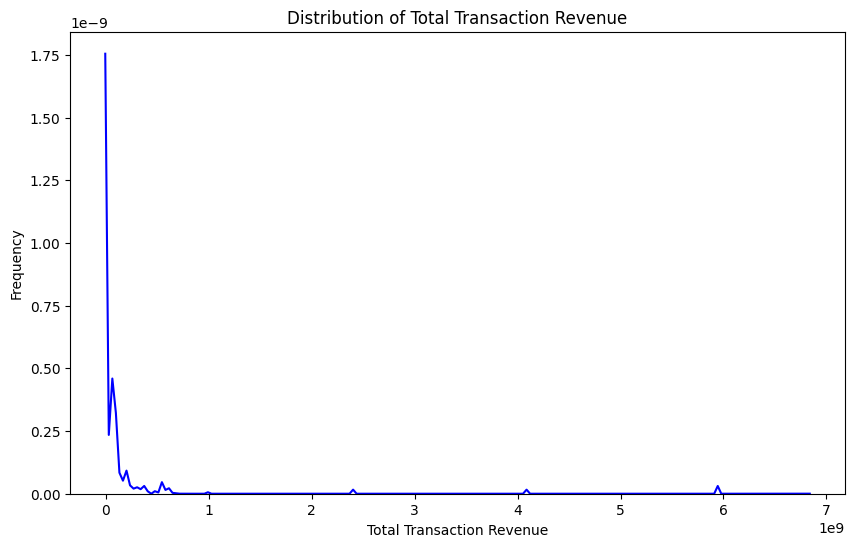

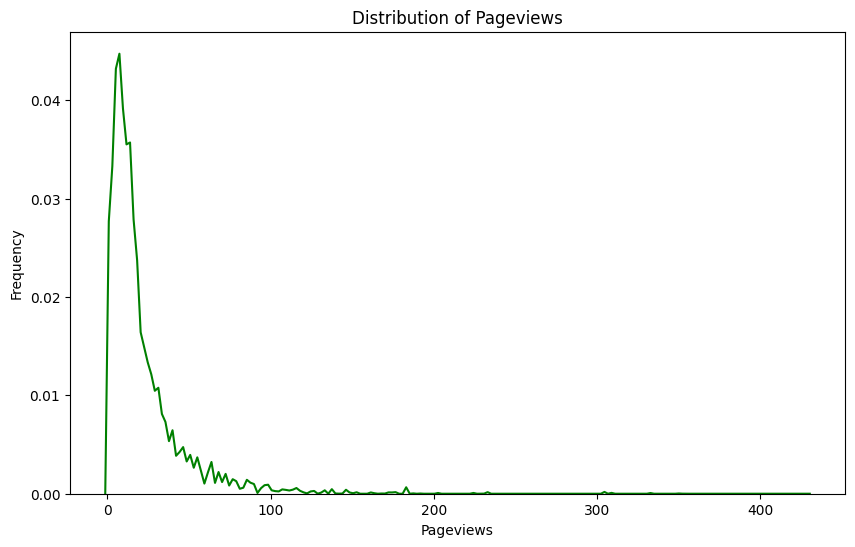

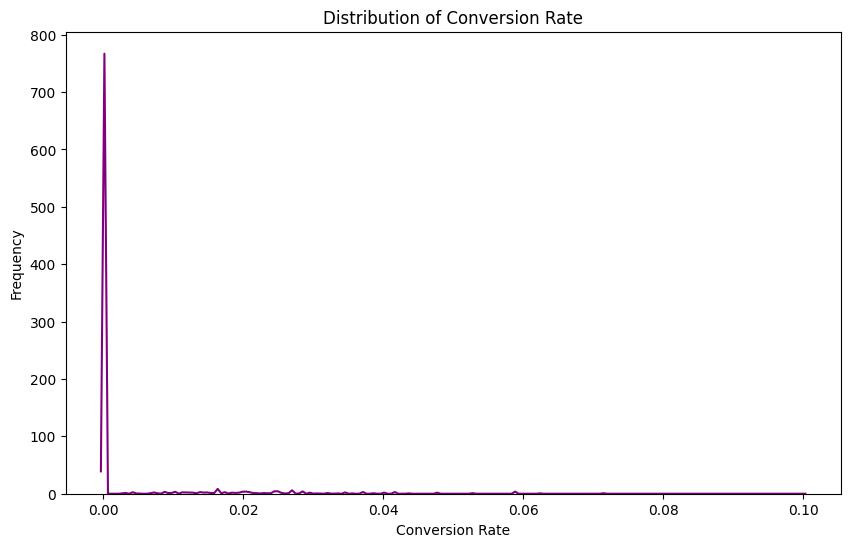

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of total transaction revenue
plt.figure(figsize=(10, 6))
sns.kdeplot(df['totalTransactionRevenue'], color='blue', bw_adjust = 0.1)
plt.title('Distribution of Total Transaction Revenue')
plt.xlabel('Total Transaction Revenue')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of pageviews
plt.figure(figsize=(10, 6))
sns.kdeplot(df['pageviews'], color='green', bw_adjust = 0.1)
plt.title('Distribution of Pageviews')
plt.xlabel('Pageviews')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of conversion rate
plt.figure(figsize=(10, 6))
sns.kdeplot(df['conversionRate'], color='purple', bw_adjust = 0.1)
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.show()

Let's add the geographical insights, and visualizations of the engineered features on top of those.

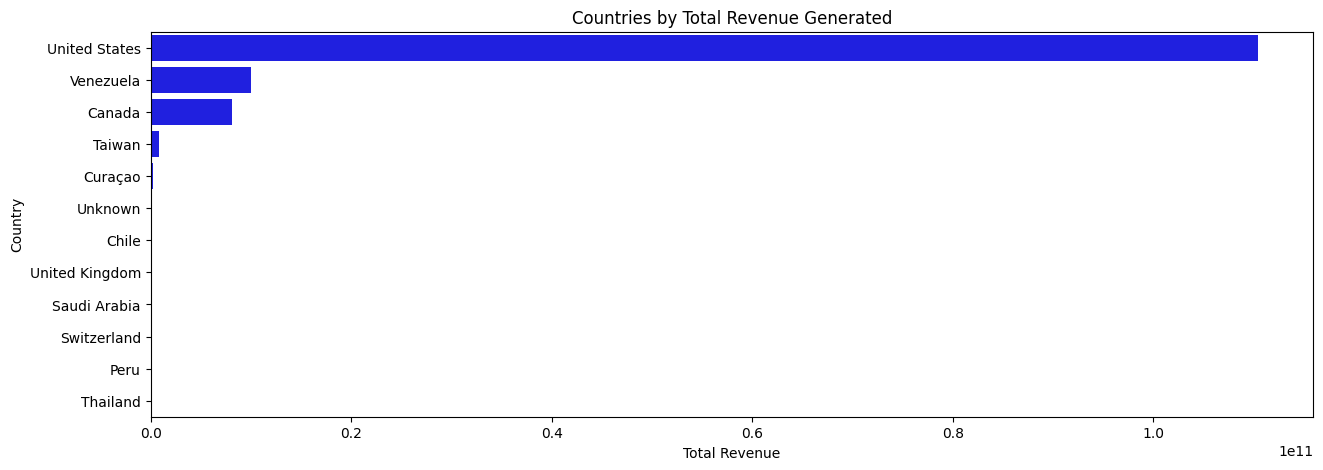

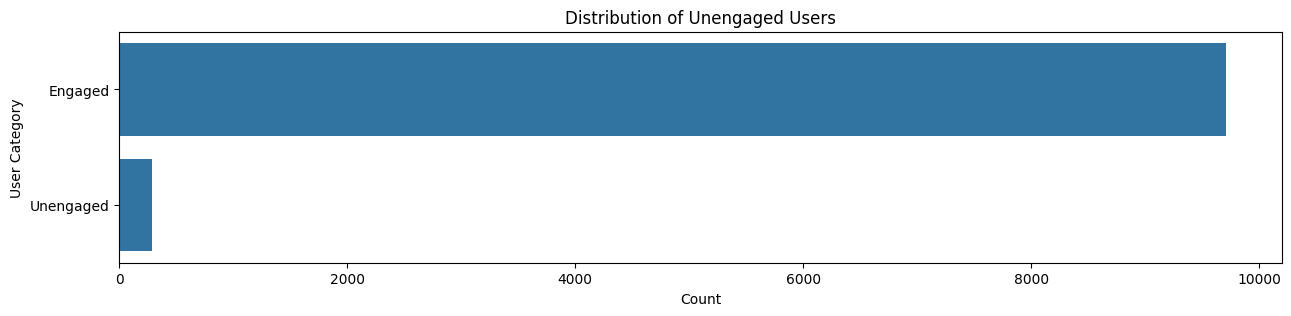

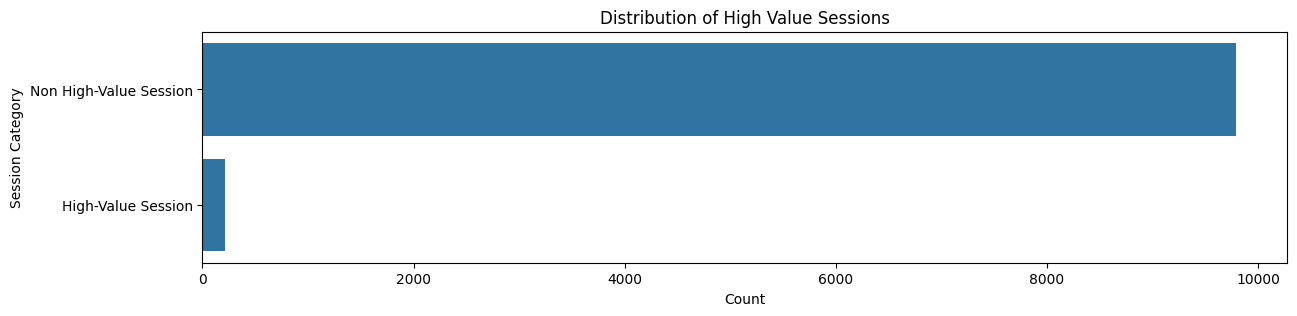

In [ ]:
# Plotting the geographical insight
grouped = df.groupby('country')['totalTransactionRevenue'].sum().sort_values(ascending=False).reset_index()
grouped = grouped[grouped['totalTransactionRevenue'] != 0] # Exclude countries with zero totalTransactionRevenue to avoid cluttering the visualization

plt.figure(figsize=(15, 5))
sns.barplot(y=grouped['country'], x=grouped['totalTransactionRevenue'], color='blue')
plt.title('Countries by Total Revenue Generated')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.show()

# Plotting the distribution of unengaged users
plt.figure(figsize=(15, 3))
sns.countplot(data=df, y='unengaged')
plt.title('Distribution of Unengaged Users')
plt.ylabel('User Category')
plt.yticks(ticks=[0, 1], labels=['Engaged', 'Unengaged'])
plt.xlabel('Count')
plt.show()

# Plotting the distribution of high value sessions
plt.figure(figsize=(14, 3))
sns.countplot(data=df, y='high_value_session')
plt.title('Distribution of High Value Sessions')
plt.ylabel('Session Category')
plt.yticks(ticks=[0, 1], labels=['Non High-Value Session', 'High-Value Session'])
plt.xlabel('Count')
plt.show()

In [ ]:
x = grouped['totalTransactionRevenue'][grouped['country']=='United States'].tolist()
y = grouped['totalTransactionRevenue'][grouped['country']!='United Kingdom'].tolist()
y = sum(y)
x = sum(x)
percent = (x/y)*100
print(f'US share of the total revenue: {percent}%')

US share of the total revenue: 84.87763553797303%



Summary Statistics Insights:

1. Revenue (totalTransactionRevenue):
Mean: 13,021,500, showing significant revenue in some transactions.
Max: A large maximum value of approximately 6.83 billion, which suggests that a few transactions are generating extremely high revenue.
Min: A lot of entries have zero revenue, indicating many sessions did not convert into purchases.

2. Transactions (transactions):
The mean number of transactions is very low (0.066), indicating most sessions are non-purchase sessions.
The max of 6 transactions suggests that multiple transactions are rare.

3. Time on Site (timeOnSite):
Mean: 699 seconds (around 11.65 minutes), with a max of 15,020 seconds (~250 minutes). This suggests that some users stay on the site for an extended period.

4. Pageviews (pageviews):
Mean: 22.14 pageviews per session, with a max of 429, indicating that some users view many pages per session.

5. Session Quality (sessionQualityDim):
The mean value is 0.095, but the range spans from 0 to 92. This could be an engagement or quality score with a very wide distribution.

6. Conversion Rate (conversionRate):
With a mean of 0.0015 and a max of 0.1, this suggests that only a small proportion of visitors convert.

7. Unengaged Sessions (unengaged):
Only 2.9% of sessions are marked as unengaged (binary 0/1 value), with a low frequency of engagement marked by 1.

8. High-Value Sessions (high_value_session):
Only 2.12% of sessions are marked as "high-value," with a binary 0/1 value. This likely represents high-purchase or high-engagement sessions.

9. Total Revenue by Country (Country):
As we can see in the bar chart above, the United States leads the totalTransactionRevenue by a long shot. And from the result above, we can see that the United States account for nearly 85% of the total revenue.

# Anomaly Detection

**ChatGPT prompt:**

Now, from the above cleaned and preprocessed dataset, do the following:

4. Implement anomaly detection and discuss the findings.

**ChatGPT response:**

1. Anomalies Identified:
Z-Score Method:
The Z-Score method identified rows where values deviate significantly from the mean (more than 3 standard deviations).
Some of the anomalies have very high transaction revenues, long times on site, or large numbers of pageviews that stand out compared to most of the data.
IQR Method:
Similarly, the IQR method detected anomalies based on values falling outside the interquartile range (1.5 times the IQR from the 25th and 75th percentiles).
The anomalies are again linked to extreme values in columns like totalTransactionRevenue, transactions, timeOnSite, and pageviews.

2. Example Anomalies:
One of the rows had a totalTransactionRevenue of 67,570,000, which stands out significantly from other values.
Some sessions with zero transactions have very high pageviews or time on site, which could indicate misclassifications or errors.

3. Discussion:
Revenue outliers: There are a few very high revenue transactions, which likely represent significant outliers. These could either be legitimate high-value sales or data entry errors.
User engagement anomalies: Sessions with extremely high time-on-site or pageviews could either reflect very engaged users or issues like session timeouts or misreporting.
Zero transactions with high activity: These could indicate sessions where users explored the site extensively but did not convert, which might warrant further investigation into potential barriers to conversion.

`# Z-Score method for anomaly detection`

`z_scores = stats.zscore(new_data[numeric_columns])`

`abs_z_scores = abs(z_scores)`

`threshold = 3  # Threshold for detecting outliers (3 standard deviations)`



`# Identify anomalies based on Z-Score threshold`

`outliers_zscore = (abs_z_scores > threshold).any(axis=1)`



`# Add a column to indicate whether each row is an anomaly based on Z-Score`

`new_data['is_anomaly_zscore'] = outliers_zscore`



`# Use the IQR method for anomaly detection`

`Q1 = new_data[numeric_columns].quantile(0.25)`

`Q3 = new_data[numeric_columns].quantile(0.75)`

`IQR = Q3 - Q1`



`# Define the lower and upper bounds for anomalies based on IQR`

`lower_bound = Q1 - 1.5 * IQR`

`upper_bound = Q3 + 1.5 * IQR`



`# Identify anomalies based on IQR method`

`outliers_iqr = ((new_data[numeric_columns] < lower_bound) | (new_data[numeric_columns] > upper_bound)).any(axis=1)`



`# Add a column to indicate whether each row is an anomaly based on IQR`

`new_data['is_anomaly_iqr'] = outliers_iqr`



`# Display rows identified as anomalies based on Z-Score and IQR`

`anomalies_zscore = new_data[new_data['is_anomaly_zscore'] == True]`

`anomalies_iqr = new_data[new_data['is_anomaly_iqr'] == True]`



`# Display some of the anomalies detected by both methods`

`print("Anomalies detected by Z-Score:")`

`print(anomalies_zscore.head())`



`print("\nAnomalies detected by IQR:")`

`print(anomalies_iqr.head())`

ChatGPT's response seems adequate.

In [ ]:
from scipy import stats

numerical_cols = df.select_dtypes(include='number').columns.tolist() # To get the numerical columns
numerical_cols.remove('fullVisitorId')
numerical_cols.remove('visitId')

# Z-Score method for anomaly detection
z_scores = stats.zscore(df[numerical_cols])
abs_z_scores = abs(z_scores)
threshold = 3  # Threshold for detecting outliers (3 standard deviations)

# Identify anomalies based on Z-Score threshold
outliers_zscore = (abs_z_scores > threshold).any(axis=1)

# Add a column to indicate whether each row is an anomaly based on Z-Score
df['is_anomaly_zscore'] = outliers_zscore

# Use the IQR method for anomaly detection
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for anomalies based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies based on IQR method
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).any(axis=1)

# Add a column to indicate whether each row is an anomaly based on IQR
df['is_anomaly_iqr'] = outliers_iqr

# Display rows identified as anomalies based on Z-Score and IQR
anomalies_zscore = df[df['is_anomaly_zscore'] == True]
anomalies_iqr = df[df['is_anomaly_iqr'] == True]

# Display some of the anomalies detected by both methods
print("Anomalies detected by Z-Score:")
print(anomalies_zscore.shape[0])

print("\nAnomalies detected by IQR:")
print(anomalies_iqr.shape[0])

Anomalies detected by Z-Score:
2136

Anomalies detected by IQR:
3516


There are several anomalies that need to be adressed:

1. Revenue outliers: There are a few very high revenue transactions, which likely represent significant outliers. These could either be legitimate high-value sales or data entry errors.

2. User engagement anomalies: Sessions with extremely high time-on-site or pageviews could either reflect very engaged users or issues like session timeouts or misreporting. This might need further investigation.

3. Zero transactions with high activity: These could indicate sessions where users explored the site extensively but did not convert, which might warrant further investigation into potential barriers to conversion. And if there truly are barriers, we need to attend to them.

# Summary and Recommendation

## Summary

Insights:

1. Revenue: High value transactions contribute significantly to total revenue, while many sessions result in no purchases. Focus on identifying and targeting high-value customers.

2. Transactions: Most sessions do not convert. Improve conversion rates by optimizing the sales funnel and user experience.

3. User Engagement: Some sessions show unusually high time-on-site or pageviews. Investigate session tracking and consider improving content to increase engagement.

4. Conversion Rate: Very low conversion rates. Focus on CRO techniques like A/B testing and simplifying the checkout process.

5. Country Revenue: The United States contributes 85% of revenue, suggesting the need for targeted marketing in other regions.

Anomalies:
1. Revenue Outliers: Extremely high transactions could be legitimate or errors. Verify and explore potential upselling opportunities.

2. User Engagement Anomalies: Sessions with high engagement but no purchases could indicate friction in the user journey. Improve the conversion process for these users.

3. Zero Transactions with High Activity: Investigate why these sessions didn’t convert despite high engagement. Optimize the checkout process to reduce friction.

## Recommendation

Overall Recommendations for the Client:

1. Improve Conversion Rates: A majority of sessions are not converting. Focus on conversion rate optimization techniques, such as simplifying the checkout process, improving product descriptions, and using targeted calls to action.

2. Address Outliers and High-Value Transactions: Verify the validity of very high revenue transactions and identify if there are patterns or customer segments that are responsible for these sales. Consider further targeting these high-value segments.

3. Improve User Engagement: Sessions with long time-on-site and high pageviews may suggest interest, but they could also indicate issues with navigation. Investigate whether these sessions represent genuine interest or if they are signs of poor user experience.

4. Global Expansion: While the United States is a dominant revenue driver, it’s important to understand why other countries aren’t contributing as much. Consider localized marketing strategies or adjustments to the website to cater to international users.

5. Anomaly Monitoring: Implement continuous monitoring for anomalies in key metrics (such as time-on-site, pageviews, and revenue). Regular anomaly detection can help quickly address issues as they arise.